In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [32]:
clust = pd.read_csv("../../figure_1-2/INTERMEDIATE_FILES/H3K79me2_3kbDownTSS_mESC_NPC48h_5cl.txt",sep="\t")
genes_H3K79me2_positive = clust.loc[(clust.deepTools_group == "cluster_1") | (clust.deepTools_group == "cluster_2") | (clust.deepTools_group == "cluster_3")]["name"].unique()
len(genes_H3K79me2_positive)

8268

In [69]:
atac = pd.read_csv("../INTERMEDIATE_FILES/Final_Table_topPC1ATACPeaks.tsv",sep="\t")
atac_down = atac.loc[(atac["4"] == "intron") & (atac.Loadings_PC1 >0)]
atac_up = atac.loc[(atac["4"] == "intron") & (atac.Loadings_PC1 <0)]
atac_down_introns_genes = atac_down.geneID.unique()
atac_up_introns_genes = atac_up.geneID.unique()
len(atac_introns_genes)

87

In [37]:
len(set(genes_H3K79me2_positive).intersection(set(atac_down_introns_genes)))

54

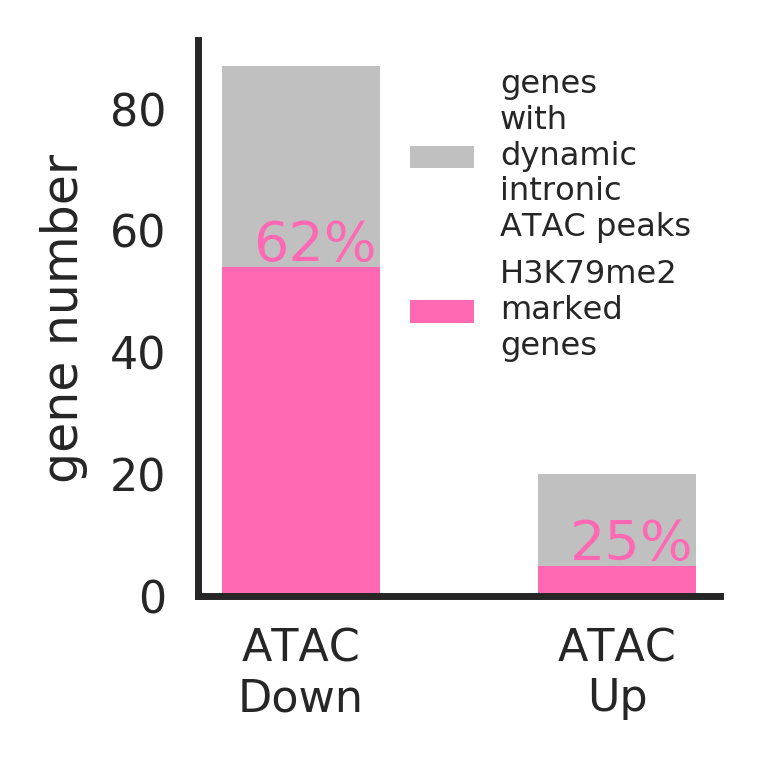

In [156]:
fig,ax = plt.subplots(dpi=400,figsize=(2,2))
atacdown_K79pl_genes = len(set(genes_H3K79me2_positive).intersection(set(atac_down_introns_genes)))
atacup_K79pl_genes = len(set(genes_H3K79me2_positive).intersection(set(atac_up_introns_genes)))

ax.bar([0,1],[len(atac_down_introns_genes), len(atac_up_introns_genes)], width=0.5,color="silver", label= "genes\nwith\ndynamic\nintronic\nATAC peaks")
ax.bar([0,1],[atacdown_K79pl_genes, 
              atacup_K79pl_genes],width=0.5, color="hotpink", label = "H3K79me2\nmarked\ngenes")
ax.set_xticks([0,1])
ax.set_xticklabels(["ATAC\nDown","ATAC\nUp"])
ax.annotate("{}%".format(int((atacdown_K79pl_genes * 100)/len(atac_down_introns_genes))),(-0.15,atacdown_K79pl_genes+1), color='hotpink')
ax.annotate("{}%".format(int((atacup_K79pl_genes * 100)/len(atac_up_introns_genes))),(0.85,atacup_K79pl_genes+1), color='hotpink')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='best', fontsize="xx-small")
ax.set_ylabel("gene number")
plt.tight_layout()
plt.savefig("../FIGURES/percent_H3K79mePositive_intronicATAC.pdf")

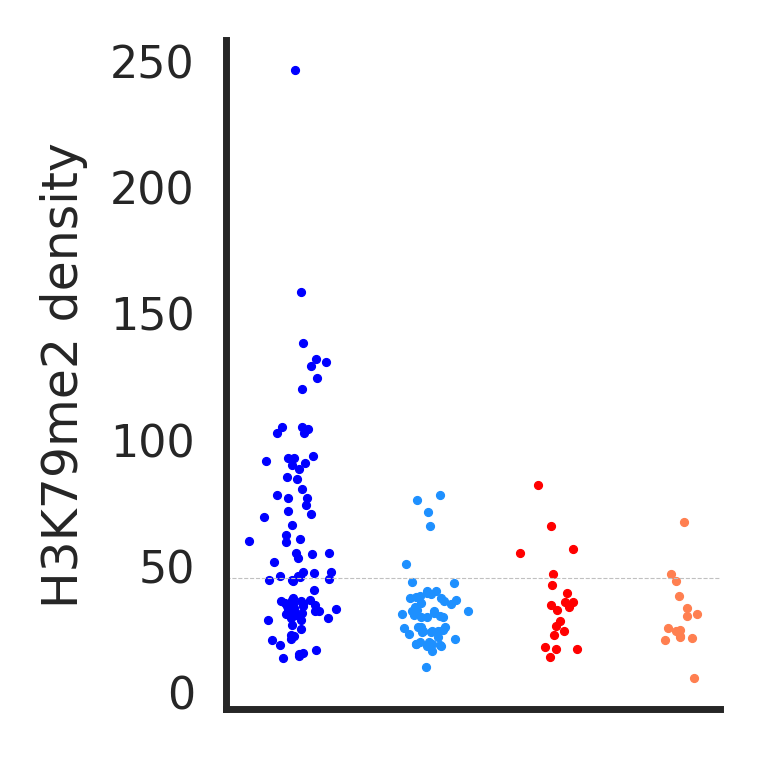

In [157]:
atac_introns_up = atac.loc[(atac["4"] == "intron")& (atac.Loadings_PC1 <0)].dens_H3K79me2.values
atac_intergenic_up = atac.loc[(atac["4"] == "Intergenic")& (atac.Loadings_PC1 <0)].dens_H3K79me2.values
atac_introns_down = atac.loc[(atac["4"] == "intron")& (atac.Loadings_PC1 >0)].dens_H3K79me2.values
atac_intergenic_down = atac.loc[(atac["4"] == "Intergenic")& (atac.Loadings_PC1 >0)].dens_H3K79me2.values

fig,ax = plt.subplots(dpi=400,figsize=(2,2))

ax.scatter(np.random.normal(loc=0, scale=0.1, size=len(atac_introns_down)), atac_introns_down, s=2, color = "blue")
ax.scatter(np.random.normal(loc=1, scale=0.1, size=len(atac_intergenic_down)), atac_intergenic_down,s=2, color = "dodgerblue")
ax.scatter(np.random.normal(loc=2, scale=0.1, size=len(atac_introns_up)), atac_introns_up, s=2, color = "red")
ax.scatter(np.random.normal(loc=3, scale=0.1, size=len(atac_intergenic_up)), atac_intergenic_up,s=2, color = "coral")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axhline(45,linewidth=0.2,linestyle="--",color="silver")

ax.set_ylabel("H3K79me2 density")
ax.set_xticks([])

plt.tight_layout()

plt.savefig("../FIGURES/ASSOCIATION_ATACDYNAMICS_H3K79me2Dens_intron_inter.png")


In [134]:
atac.loc[atac.dens_H3K79me2>240]

,3,DMSO1,DMSO2,EPZ1,EPZ2,mean_DMSO,mean_EPZ,LogRatio,Loadings_PC1,chr,...,baseMean,log2FoldChange,lfcSE,pvalue,padj,symbol,peak_id,dens_H3K79me2,5,4
22,topPeak_23,6.822793,6.831201,6.538206,6.415599,6.826997,6.476903,-0.350094,0.021922,8,...,12996.562465,-0.156168,0.079849,3.498672e-03,1.152834e-01,Efnb2,8_8653917_8654412,254.545455,NaN,NaN
174,topPeak_175,6.913363,7.150952,6.591601,6.935627,7.032157,6.763614,-0.268543,0.017054,11,...,NaN,0.000000,NaN,NaN,NaN,NaN,11_96311688_96312333,419.379845,NaN,NaN
368,topPeak_369,6.279198,6.091138,6.238211,6.537677,6.185168,6.387944,0.202776,-0.015207,11,...,5949.075829,-0.625213,0.074273,1.943420e-18,7.377222e-15,Hoxb4,11_96318517_96318878,404.432133,NaN,NaN
377,topPeak_378,7.074433,7.193964,6.953043,6.864409,7.134199,6.908726,-0.225473,0.015147,11,...,22430.659193,-0.466731,0.068598,6.083223e-13,8.397059e-10,Hoxb3,11_96324100_96324862,466.535433,NaN,NaN
501,topPeak_502,6.685502,6.804317,6.349086,6.660479,6.744910,6.504782,-0.240127,0.014422,2,...,4321.506959,-0.476711,0.088406,3.085716e-09,1.952229e-06,Skida1,2_18040887_18041747,246.511628,yes,intron
671,topPeak_672,5.722510,5.695631,5.889390,5.958527,5.709070,5.923958,0.214888,-0.013620,8,...,13.692023,0.000527,0.055714,8.383554e-01,NaN,RP23-246H16.1,8_120536282_120536492,314.285714,NaN,NaN
694,topPeak_695,4.996463,5.113491,4.881461,4.824628,5.054977,4.853044,-0.201932,0.013561,1,...,5107.555673,-0.162138,0.083926,3.441387e-03,1.145921e-01,Phlpp1,1_106176791_106177088,326.599327,NaN,NaN
772,topPeak_773,5.269860,5.289463,5.625365,5.402653,5.279662,5.514009,0.234347,-0.013227,11,...,6376.261598,-0.016077,0.049446,5.312574e-01,8.929054e-01,Hoxb2,11_96351827_96352086,306.949807,NaN,NaN
845,topPeak_846,7.725823,7.758474,7.549985,7.520949,7.742148,7.535467,-0.206681,0.013007,13,...,13869.477012,-0.652065,0.082900,1.672511e-16,3.627914e-13,RP23-88A13.2,13_83739311_83740000,406.386067,NaN,NaN
1471,topPeak_1472,7.320773,7.395147,7.201889,7.165083,7.357960,7.183486,-0.174474,0.011436,7,...,51186.150067,-0.005605,0.043153,8.504258e-01,9.748163e-01,Rps9,7_3703702_3704535,279.111645,NaN,NaN
